In [2]:
import numpy as np
from itertools import combinations
from scipy.sparse import dok_matrix
from operator import add

In [3]:
class SimplicialComplex:
    def __init__(self, simplices=[]):
        self.import_simplices(simplices=simplices)
 
    def import_simplices(self, simplices=[]):
        self.simplices = map(lambda simplex: tuple(sorted(simplex)), simplices)
        self.face_set = self.faces()
    def faces(self):
        faceset = set()
        for simplex in self.simplices:
            numnodes = len(simplex)
            for r in range(numnodes, 0, -1):
                for face in combinations(simplex, r):
                    faceset.add(face)
        return faceset
    def n_faces(self, n):
        return filter(lambda face: len(face)==n+1, self.face_set)

In [4]:
sc = SimplicialComplex([('a', 'b', 'c', 'd')])

In [5]:
print(list(map(lambda simplex: tuple(sorted(simplex)), [('f', 'e', 'g', 'h'), ('a', 'b', 'c', 'd')])))

[('e', 'f', 'g', 'h'), ('a', 'b', 'c', 'd')]


In [6]:
sc.face_set

{('a',),
 ('a', 'b'),
 ('a', 'b', 'c'),
 ('a', 'b', 'c', 'd'),
 ('a', 'b', 'd'),
 ('a', 'c'),
 ('a', 'c', 'd'),
 ('a', 'd'),
 ('b',),
 ('b', 'c'),
 ('b', 'c', 'd'),
 ('b', 'd'),
 ('c',),
 ('c', 'd'),
 ('d',)}

In [43]:
import networkx as nx
import itertools
from scipy.spatial import distance
from itertools import product
 
class VietorisRipsComplex(SimplicialComplex):
    def __init__(self, points, epsilon, labels=None, distfcn=distance.euclidean):
        self.pts = points
        self.labels = range(len(self.pts)) if labels==None or len(labels)!=len(self.pts) else labels
        self.epsilon = epsilon
        self.distfcn = distfcn
        self.network = self.construct_network(self.pts, self.labels, self.epsilon, self.distfcn)
        self.import_simplices(map(tuple, list(nx.find_cliques(self.network))))
 
    def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
                if dist < epsilon:
                    g.add_edge(pair[0][1], pair[1][1])
        return g

In [23]:
def construct_network(self, points, labels, epsilon, distfcn):
        g = nx.Graph()
        g.add_nodes_from(labels)
        zips = zip(points, labels)
        for pair in product(zips, zips):
            if pair[0][1]!=pair[1][1]:
                dist = distfcn(pair[0][0], pair[1][0])
                if dist < epsilon:
                    g.add_edge(pair[0][1], pair[1][1])
        return g

In [100]:
epsilon = 1
distfcn=distance.euclidean
g = nx.Graph()
points =  [(0.1, 0.2, 0.1, 0.1), (0.1, 0.1, 0.1, 0.1), (0.8, 0.5, 0.3, 0.2)]
prod = list(product(points, points))
for pair in prod:
    if pair[0]!=pair[1]:
        dist = distfcn(pair[0], pair[1])
        if dist < epsilon:
            g.add_edge(pair[0], pair[1])
g.edges()

EdgeView([((0.1, 0.2, 0.1, 0.1), (0.1, 0.1, 0.1, 0.1)), ((0.1, 0.2, 0.1, 0.1), (0.8, 0.5, 0.3, 0.2)), ((0.1, 0.1, 0.1, 0.1), (0.8, 0.5, 0.3, 0.2))])

In [97]:
help(add_edge)

NameError: name 'add_edge' is not defined

In [16]:
vrc = VietorisRipsComplex(points = [(0.1, 0.1, 0.1, 0.1), (0.1, 0.1, 0.1, 0.1)], epsilon = 1)

In [22]:
vrc.network

In [14]:
vrc.network.edges()

EdgeView([])

In [9]:
from importlib import reload 
reload(vrc)

sc = vrc.SimplicialComplex([('f', 'e', 'g', 'h'), ('a', 'b', 'c', 'd')])


In [11]:
vc = vrc.VietorisRipsComplex(sc, epsilon = 1)

In [12]:
vc

### topologylayer

In [2]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature
import torch, numpy as np, matplotlib.pyplot as plt

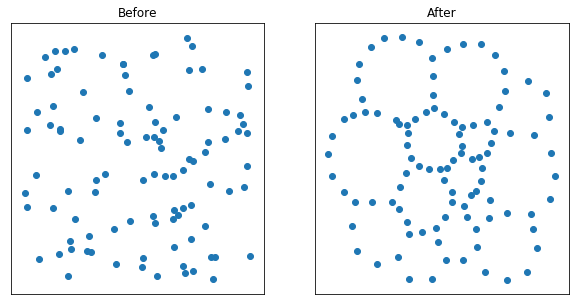

In [5]:
# random pointcloud
np.random.seed(0)
data = np.random.rand(100, 2)

# optimization to increase size of holes
layer = AlphaLayer(maxdim=1)
x = torch.autograd.Variable(torch.tensor(data).type(torch.float), requires_grad=True)
f1 = BarcodePolyFeature(1,2,0)
optimizer = torch.optim.Adam([x], lr=1e-2)
for i in range(100):
    optimizer.zero_grad()
    loss = -f1(layer(x))
    loss.backward()
    optimizer.step()
    
    
# save figure
y = x.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(data[:,0], data[:,1])
ax[0].set_title("Before")
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')

In [8]:
import torch
from topologylayer.nn import LevelSetLayer1D, SumBarcodeLengths
# creates a superlevel set layer on a 10-point line.
layer = LevelSetLayer1D(size=10, sublevel=False)
feat = SumBarcodeLengths(dim=0)
y = torch.rand(10, dtype=torch.float).requires_grad_(True)
p = feat(layer(y))

tensor(1.7371, grad_fn=<SumBackward2>)

In [13]:
from topologylayer.nn import LevelSetLayer2D, SumBarcodeLengths
import torch

layer = LevelSetLayer2D(size=(3,3), maxdim=1, sublevel=False)
x = torch.tensor([[2, 1, 1],[1, 0.5, 1],[1, 1, 1]], dtype=torch.float)
dgms, issublevelset = layer(x)

In [18]:
dgms

(tensor([[2.0000,   -inf],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 1.0000],
         [0.5000, 0.5000]]), tensor([[1.0000, 1.0000],
         [1.0000, 1.0000],
         [1.0000, 0.5000],
         [0.5000, 0.5000],
         [0.5000, 0.5000],
         [0.5000, 0.5000],
         [0.5000, 0.5000],
         [0.5000, 0.5000]]))

In [19]:
from topologylayer import SimplicialComplex
from topologylayer.nn import LevelSetLayer
import torch

cpx = SimplicialComplex()
cpx.append([0])
for i in range(1,5):
    cpx.append([i])
    cpx.append([0,i])

layer = LevelSetLayer(cpx, maxdim=0, sublevel=True)
y = torch.tensor([1,0,0,0,0], dtype=torch.float).requires_grad_(True)
dgms, issublevel = layer(y)

In [23]:
cpx.printCells()

[0]
[1]
[0, 1]
[2]
[0, 2]
[3]
[0, 3]
[4]
[0, 4]


In [24]:
y

tensor([1., 0., 0., 0., 0.], requires_grad=True)

In [25]:
dgms

(tensor([[0., inf],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [1., 1.]], grad_fn=<SubLevelSetDiagramBackward>),)

In [26]:
import torch
from topologylayer.nn import RipsLayer
n, d = 10, 2
layer = RipsLayer(n, maxdim=1)
x = torch.rand(n, d, dtype=torch.float).requires_grad_(True)
dgms, issublevelset = layer(x)

In [29]:
print(x)
print(dgms)

tensor([[0.7464, 0.5587],
        [0.7149, 0.9730],
        [0.3120, 0.6804],
        [0.0451, 0.1562],
        [0.2335, 0.6036],
        [0.7455, 0.5065],
        [0.4948, 0.7577],
        [0.3208, 0.9709],
        [0.5341, 0.2685],
        [0.7991, 0.9986]], requires_grad=True)
(tensor([[0.0000,    inf],
        [0.0000, 0.3208],
        [0.0000, 0.3079],
        [0.0000, 0.4855],
        [0.0000, 0.1098],
        [0.0000, 0.0522],
        [0.0000, 0.1985],
        [0.0000, 0.2752],
        [0.0000, 0.3183],
        [0.0000, 0.0881]], grad_fn=<FlagDiagramBackward>), tensor([[0.2906, 0.2906],
        [0.3033, 0.3033],
        [0.3549, 0.3549],
        [0.3596, 0.3596],
        [0.3775, 0.3775],
        [0.3882, 0.3882],
        [0.3941, 0.3941],
        [0.4156, 0.4156],
        [0.4431, 0.4431],
        [0.4502, 0.4680],
        [0.4512, 0.4512],
        [0.4671, 0.4671],
        [0.4676, 0.4676],
        [0.4680, 0.4680],
        [0.4791, 0.4791],
        [0.4908, 0.4908],
        [

### Plex4

In [ ]:
function intervals = SIFTS(D, max_dimension, max_filtration_value, num_divisions)
% Compute the Similarity Filtration with Tim Skeleton (SIFTS).
%
% intervals = SIFTS(D, max_dimension, max_filtration_value, num_divisions)
%
% Input
%	D: an n*n symmetric matrix, D_ij = the distance between points i, j
%	max_dimension: 
%		E.g. 2 to get 0-homology (clusters) and 1-homology (holes)
%	max_filtration_value: the largest diameter when constructing the Rips complex.  
%		E.g. max(max(D)), though sometimes the Rips complex is too big.
%	num_divisions:
%		Filtration resolution, e.g. 100.
%
% Output
%	intervals: the birth-death intervals of persistent homology groups.
% 		To extract the 1-homology barcodes from time skeleton semantic filtration, do
%		endpoints = homology.barcodes.BarcodeUtility.getEndpoints(intervals, 1, true)
%		See javaPlex documentation for details.
%
% Note: Be sure to run load_javaplex first.
%
% Created by: Xiaojin Zhu, jerryzhu@cs.wisc.edu.  April 2013.
%
% Citation:
%    Xiaojin Zhu. 
%    Persistent homology: An introduction and a new text representation for natural language processing. 
%    In The 23rd International Joint Conference on Artificial Intelligence (IJCAI), 
%    2013. 

import edu.stanford.math.plex4.*;

% time skeleton
for i=1:size(D,1)-1,
  D(i,i+1)=0;
  D(i+1,i)=0;
end

% create a Vietoris-Rips stream
m_space = metric.impl.ExplicitMetricSpace(D);
stream = api.Plex4.createVietorisRipsStream(m_space, max_dimension, max_filtration_value, num_divisions);
stream.finalizeStream();
fprintf('SIFTS: Rips complex size=%d\n',stream.getSize());

% get persistence algorithm over Z/2Z
persistence = api.Plex4.getModularSimplicialAlgorithm(max_dimension, 2);

% compute the persistent intervals
intervals = persistence.computeAnnotatedIntervals(stream)

% create the barcode plots
options.filename = 'SIFTS';
options.max_filtration_value = max_filtration_value;
options.max_dimension = max_dimension - 1;
plot_barcodes(intervals, options);

In [31]:
import edu.stanford.math.plex4

ModuleNotFoundError: No module named 'edu'

In [36]:
import pickle, sys, os 
from collections import defaultdict

In [40]:
sys.argv

['/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py',
 '-f',
 '/Users/Mateusz_Jodlowski/Library/Jupyter/runtime/kernel-49bcff85-c6a8-45ff-b8cf-1dd1f0a71443.json']

In [38]:
javaplex_path=str(sys.argv[5])

IndexError: list index out of range

In [37]:
libs = [                                                                                                 
	 os.path.join(javaplex_path,'javaplex.jar')
 	]                    
print(libs)   

NameError: name 'javaplex_path' is not defined

In [42]:
import matlab.engine

ModuleNotFoundError: No module named 'matlab.engine'; 'matlab' is not a package